In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.utils import to_categorical 
from keras import backend as K
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Activation

In [3]:
traindata = pd.read_csv('sign_mnist_train.csv')
print(traindata.shape)
traindata.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
y_train=traindata['label'].values


In [5]:
traindata.drop('label',axis=1,inplace=True)

In [6]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  24
Output classes :  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [7]:
x_train=traindata.values

In [8]:
testdata = pd.read_csv('sign_mnist_test.csv')
print(testdata.shape)
testdata.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [9]:
y_test=testdata['label'].values

In [10]:
testdata.drop('label',axis=1,inplace=True)

In [11]:
# Find the unique numbers from the test labels
classes_test = np.unique(y_test)
nClasses_test = len(classes_test)
print('Total number of outputs : ', nClasses_test)
print('Output classes : ', classes_test)

Total number of outputs :  24
Output classes :  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [12]:
x_test=testdata.values

In [13]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  24
Output classes :  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [14]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (27455, 784)
y_train shape (27455,)
x_test shape (7172, 784)
y_test shape (7172,)


In [15]:
x_train = x_train.reshape(27455, 28, 28, 1) #add an additional dimension to represent the single-channel
x_test = x_test.reshape(7172, 28, 28, 1)

x_train = x_train.astype('float32')         # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                              # normalize each value for each pixel for the entire vector for each input
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (27455, 28, 28, 1)
Testing matrix shape (7172, 28, 28, 1)


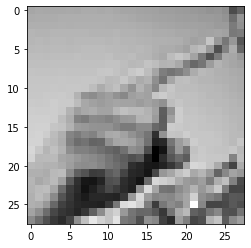

In [16]:
# Display the first image in training data
import matplotlib.pyplot as plt
plt.imshow(x_train[1].reshape(28,28),cmap='gray')

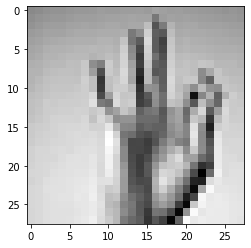

In [17]:
# Display the first image in testing data
import matplotlib.pyplot as plt
plt.imshow(x_test[1].reshape(28,28),cmap='gray')

In [18]:
# one-hot format classes
from keras.utils import np_utils   
nb_classes = 25 # number of unique digits

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [20]:
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train[0])

Original label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [21]:
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (27455, 28, 28, 1)
Testing matrix shape (7172, 28, 28, 1)


In [22]:
classifier = Sequential()
# First convolutional layer 1 accepts image input
classifier.add(Conv2D(filters=7, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1), data_format='channels_last'))
# Add a max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
convLayer01=Activation('relu')
classifier.add(convLayer01)

# Add a convolutional 2 layer
classifier.add(Conv2D(filters=9, kernel_size=(3,3),strides=(1,1),padding='same'))
# Add another max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))
convLayer02=Activation('relu')
classifier.add(convLayer02)

# Add a convolutional 3 layer
classifier.add(Conv2D(filters=9, kernel_size=(3,3),strides=(1,1),padding='same'))
# Add another max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))
convLayer03=Activation('relu')
classifier.add(convLayer03)

# Flatten and feed to output layer
# Fully Connected Layer
classifier.add(Flatten())
classifier.add(Dense(9,activation = 'relu'))
classifier.add(Dropout(0.25))
# final 25 FCN nodes
classifier.add(Dense(25,activation = 'softmax'))




In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 7)         70        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 7)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 7)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 9)         576       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 9)           0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 9)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 9)           0

In [24]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)

In [25]:
#Compile the model
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# the callBack parameter can be added to model.fit as 'callbacks = [callBack]' for early termination
from keras.callbacks import EarlyStopping
callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')

In [27]:
from sklearn.model_selection import train_test_split
x_train, valid_X, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [28]:
#Train the model
history = classifier.fit(x_train, y_train,validation_data=(valid_X, y_valid),epochs=10,batch_size=32,callbacks = [callBack])

Epoch 1/10
773/773 [==============================] - 17s 22ms/step - loss: 2.7891 - accuracy: 0.1309 - val_loss: 2.1178 - val_accuracy: 0.3554
Epoch 2/10
773/773 [==============================] - 16s 21ms/step - loss: 2.3954 - accuracy: 0.2230 - val_loss: 1.9549 - val_accuracy: 0.4388
Epoch 3/10
773/773 [==============================] - 16s 21ms/step - loss: 2.3133 - accuracy: 0.2514 - val_loss: 1.7548 - val_accuracy: 0.5084
Epoch 4/10
773/773 [==============================] - 16s 20ms/step - loss: 2.2535 - accuracy: 0.2757 - val_loss: 1.6986 - val_accuracy: 0.5157
Epoch 5/10
773/773 [==============================] - 16s 21ms/step - loss: 2.2122 - accuracy: 0.2839 - val_loss: 1.6599 - val_accuracy: 0.5098
Epoch 6/10
773/773 [==============================] - 16s 21ms/step - loss: 2.2010 - accuracy: 0.2859 - val_loss: 1.7719 - val_accuracy: 0.5120
Epoch 7/10
773/773 [==============================] - 16s 21ms/step - loss: 2.1714 - accuracy: 0.2913 - val_loss: 1.7665 - val_accuracy:

In [29]:
# Obtain accuracy on test set
score = classifier.evaluate(x_test,y_test)
print('Test accuracy:', score[1])

225/225 [==============================] - 2s 8ms/step - loss: 1.8063 - accuracy: 0.4413
Test accuracy: 0.4412994980812073


In [30]:
print('Test loss:', y_test[0])
print('Test accuracy:', y_test[1])

Test loss: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Test accuracy: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


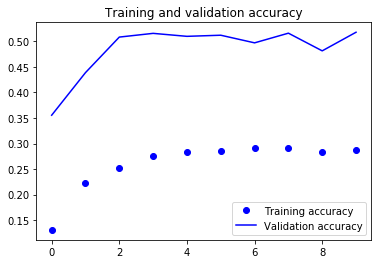

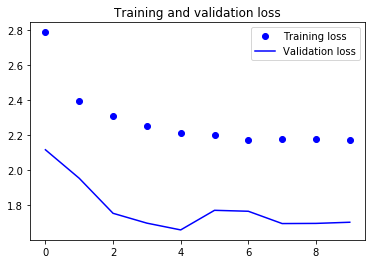

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
predicted_classes = classifier.predict(x_test)

In [33]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [34]:
predicted_classes.shape, y_test.shape

((7172,), (7172, 25))

In [35]:
rounded_predictions = classifier.predict_classes(x_test, batch_size=32, verbose=0)
rounded_predictions[1]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
num_classes=24
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(rounded_predictions, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.09      1.00      0.17       644
     Class 1       0.00      0.00      0.00       660
     Class 2       0.00      0.00      0.00       387
     Class 3       0.00      0.00      0.00       145
     Class 4       0.00      0.00      0.00        20
     Class 5       1.00      0.11      0.20       228
     Class 6       1.00      0.08      0.15      1079
     Class 7       0.00      0.00      0.00        20
     Class 8       0.00      0.00      0.00       151
     Class 9       0.00      0.00      0.00         2
    Class 10       1.00      0.13      0.23       257
    Class 11       0.00      0.00      0.00       406
    Class 12       0.00      0.00      0.00        74
    Class 13       1.00      0.07      0.14       270
    Class 14       1.00      0.04      0.08       199
    Class 15       1.00      0.29      0.45        79
    Class 16       0.00      0.00      0.00       278
    Class 17       0.00    